In [8]:
import numpy as np
from scipy import stats
from scipy.signal import correlate2d

import matplotlib.pyplot as plt
import matplotlib.animation as animation 
%matplotlib notebook

# Cellular automata

An implementation of a **2D cellular automaton**.

Experiments with **[Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)**.

## Define the automaton

In [19]:
class Cellular2D:
    
    def __init__(self, init_state, rule=None, kernel=None):
        
        """Initilizes a `Cellular2D` object. If `kernel=None`, a Conway's Game of Life (GoL) kernel is used.
        This implementation uses a GoL kernel proposed by Allen B. Downey in his book "Think Complexity".
        More on Conway's Game of Life: https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
        """
        
        self.init_state = np.array(init_state)
        self.state = np.array(init_state)
        self.rule = rule
        self.kernel = kernel
        self.n_cells = np.sum(np.ones_like(init_state))
        
        if not self.rule:
            # Define a Game of Life kernel
            # More on the logic behind the implementation: 
            # https://greenteapress.com/complexity/html/thinkcomplexity008.html#toc49
            self.rule = [3, 12, 13]
            
        if not self.kernel:
            # Define a kernel
            # More on the logic behind the implementation: 
            # https://greenteapress.com/complexity/html/thinkcomplexity008.html#toc49
            self.kernel = np.ones((3, 3))
            self.kernel[1, 1] *= 10
            
        self.history = {
            'step': [0],
            'entropy': [self.get_entropy()],
            'percent_living': [np.sum(init_state) / self.n_cells]
        }  
        
        
    def get_entropy(self):
        x = self.state
        p = np.sum(x) / np.sum(np.ones_like(x))
        return -(p * np.log(p) + (1 - p) * np.log(1 - p)) 
        
        
    def run_step(self):
        
        """Runs single time step of the automaton."""
        
        correlated = correlate2d(self.state, self.kernel, mode='same')
        self.state = np.isin(correlated, self.rule).astype('uint8')
        
        # Update history
        self.history['step'].append(self.history['step'][-1] + 1)
        self.history['entropy'].append(self.get_entropy())
        self.history['percent_living'].append(np.sum(self.state) / self.n_cells)
        
        return self.state
        
        
    def run(self, n_timesteps, reset_state=False): 
        
        """Runs the automaton for `n_timesteps` steps."""
        
        if reset_state:
            self.state = self.init_state
        
        for i in range(n_timesteps):
            self.state = self.run_step()
        
        return self.state

## Game of Life

### Initialize

In [26]:
# Define hyperparams
STEPS = 3000
SIZE = (150, 150)
P = .5
ANIMATION_SPEED = 50

In [27]:
# Define grid init state
init_state = np.random.binomial(1, P, SIZE)

# Initialize the automaton
c2 = Cellular2D(init_state)

### Animate

<IPython.core.display.Javascript object>


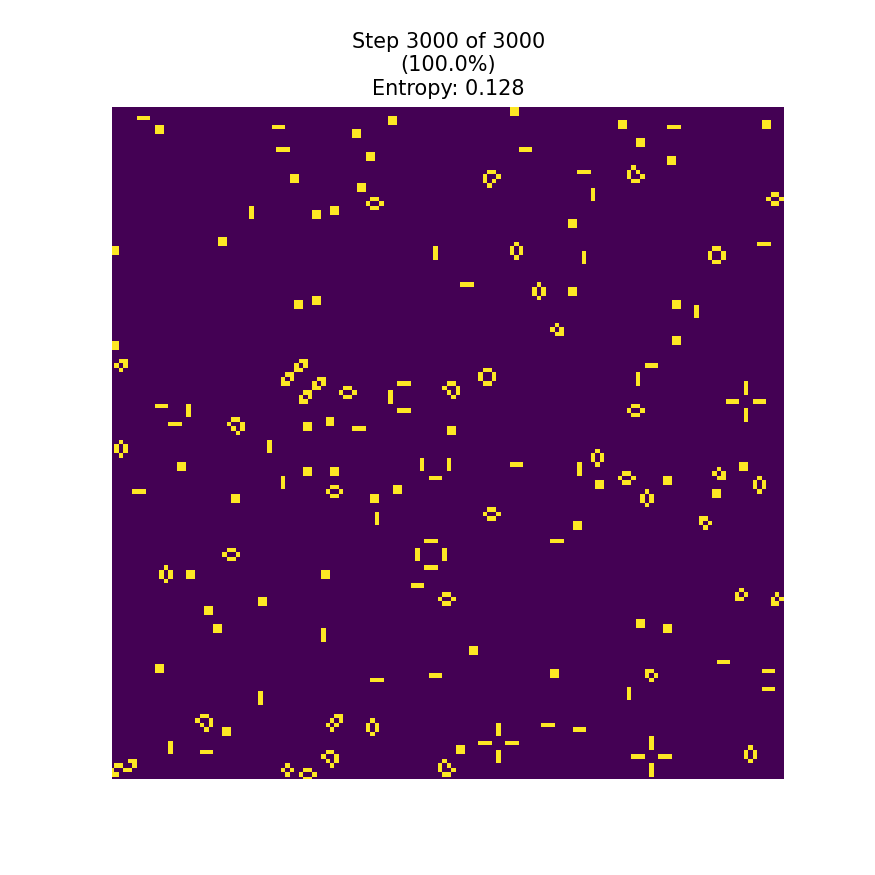

In [28]:
# Create a blank window
fig = plt.figure(figsize=(7, 7)) 
axis = plt.axes(xlim =(0, SIZE[0]),
                ylim =(0, SIZE[1])) 
plt.axis('off')

img = plt.imshow(init_state, interpolation=None)

# Define init function
def init(): 
    ent = c2.history['entropy'][-1]
    plt.title(f'Step 1 of {STEPS}\n({100 * 0 / STEPS:0.1f}%)\nEntropy: {ent:0.3f}')
    img.set_data(init_state) 
    return img,
   
# Define the animate function
def animate(i): 
    step = c2.run_step()
    ent = c2.history['entropy'][-1]
    plt.title(f'Step {i + 1} of {STEPS}\n({100*(i + 1) / STEPS:0.1f}%)\nEntropy: {ent:0.3f}')
    img.set_data(step) 
    return img,
   
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=STEPS, interval=ANIMATION_SPEED, blit=True, repeat=False) 

### Analyze

<IPython.core.display.Javascript object>


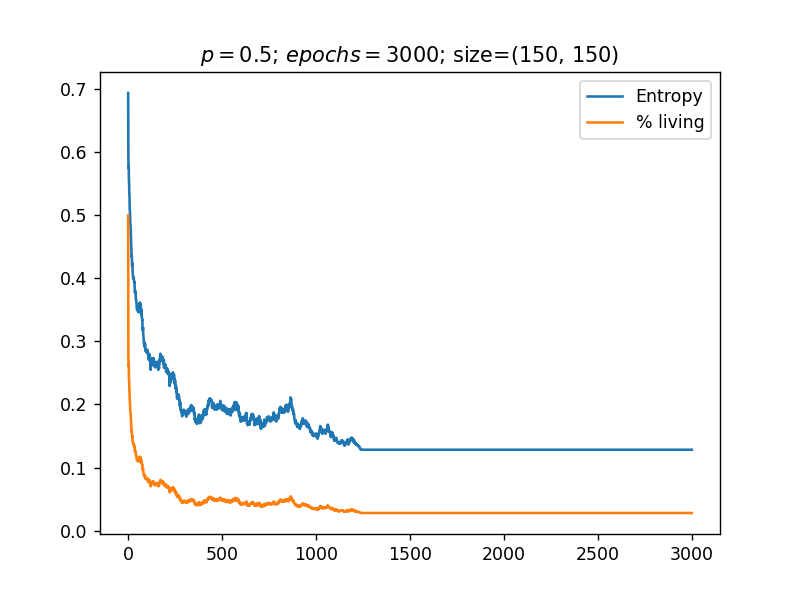

In [30]:
plt.plot(c2.history['entropy'], label='Entropy')
plt.plot(c2.history['percent_living'], label='% living')
plt.legend()
plt.title(f'$p={P}$; $epochs={STEPS}$; size={SIZE}')
plt.show()

## Day & Night

https://en.wikipedia.org/wiki/Day_and_Night_(cellular_automaton)

 It is defined by rule notation B3678/S34678, meaning that a dead cell becomes live (is born) if it has 3, 6, 7, or 8 live neighbors, and a live cell remains alive (survives) if it has 3, 4, 6, 7, or 8 live neighbors, out of the eight neighbors in the Moore neighborhood. 

### Initialize

In [39]:
# Define a rule
rule_dn = [3, 6, 7, 8, 13, 14, 16, 17, 18]

In [56]:
# Define hyperparams
STEPS = 3000
SIZE = (150, 150)
P = .5
ANIMATION_SPEED = 25

In [57]:
# Define grid init state
init_state = np.random.binomial(1, P, SIZE)

# Initialize the automaton
c2_dn = Cellular2D(init_state, rule=rule_dn)

### Animate

<IPython.core.display.Javascript object>


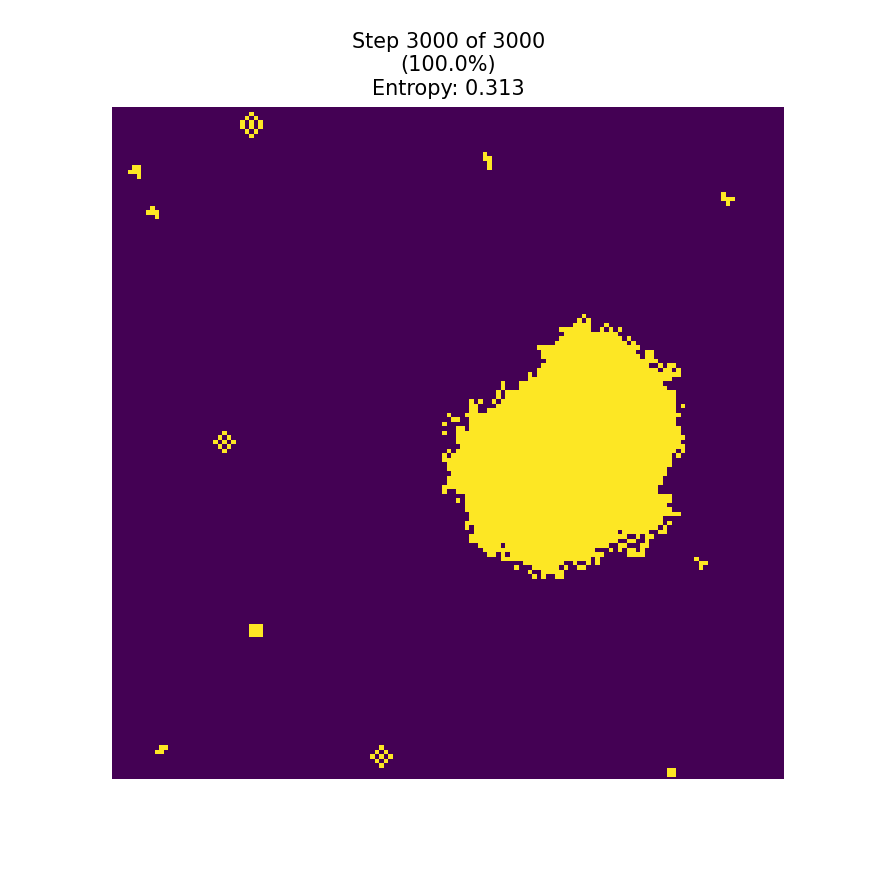

In [58]:
# Create a blank window
fig = plt.figure(figsize=(7, 7)) 
axis = plt.axes(xlim =(0, SIZE[0]),
                ylim =(0, SIZE[1])) 
plt.axis('off')

img = plt.imshow(init_state, interpolation=None)

# Define init function
def init(): 
    ent = c2_dn.history['entropy'][-1]
    plt.title(f'Step 1 of {STEPS}\n({100 * 0 / STEPS:0.1f}%)\nEntropy: {ent:0.3f}')
    img.set_data(init_state) 
    return img,
   
# Define the animate function
def animate(i): 
    step = c2_dn.run_step()
    ent = c2_dn.history['entropy'][-1]
    plt.title(f'Step {i + 1} of {STEPS}\n({100*(i + 1) / STEPS:0.1f}%)\nEntropy: {ent:0.3f}')
    img.set_data(step) 
    return img,
   
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=STEPS, interval=ANIMATION_SPEED, blit=True, repeat=False) 

### Analyze

<IPython.core.display.Javascript object>


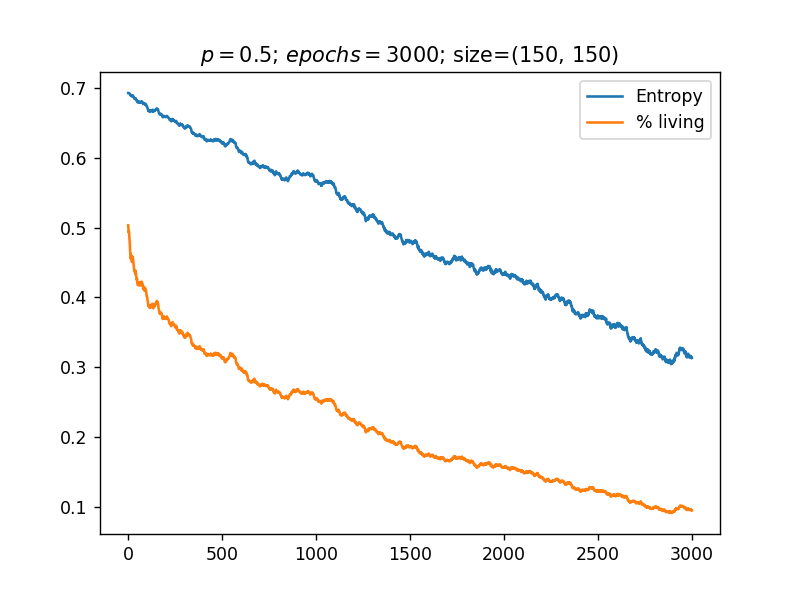

In [59]:
plt.plot(c2_dn.history['entropy'], label='Entropy')
plt.plot(c2_dn.history['percent_living'], label='% living')
plt.legend()
plt.title(f'$p={P}$; $epochs={STEPS}$; size={SIZE}')
plt.show()